# Lab 6 - Data Visualization with Seaborn

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [15]:
week3 = pd.read_csv("nfloffenseweek3.csv")
week4 = pd.read_csv("nfloffenseweek4.csv")
week5 = pd.read_csv("nfloffenseweek5.csv")
week6 = pd.read_csv("nfloffenseweek6.csv")
week7 = pd.read_csv("nfloffenseweek7.csv")
df_teams = pd.read_csv("nfl_teams.csv")

In [16]:
week3.insert(loc=2,column='week',value=3)
week4.insert(loc=2,column='week',value=4)
week5.insert(loc=2,column='week',value=5)
week6.insert(loc=2,column='week',value=6)
week7.insert(loc=2,column='week',value=7)

## NFL Offense Data

1. Import the NFL week 3-7 data and add a week column to dataset and set the value to the given week (e.g. 3 )for all rows from that week. Combine the weekly dataframes by adding the dataframes together row-wise. Next, merge the division and abbreviation data to this dataframe so that the division and conference info is included (using  team_colors_logos.csv or nfl_teams.csv).

In [17]:
week_files = [week3,week4,week5,week6,week7]
df = pd.concat(week_files)

df = df.merge(df_teams, how='left',on="team")
df

,rank,team,week,games,points_scored,total_yards,offensive_plays,yards_per_play,turnovers_lost,fumbles_lost,...,penalties,penalty_yards,first_down_penalties,percentage_scoring_drives,percentage_turnover_drives,expected_points,ID,Abbreviation,Conference,Division
0,1,Baltimore Ravens,3,3,99,1141,166,6.9,3,1,...,8,44,5,42.9,8.6,35.63,3.0,BAL,AFC,North
1,2,Detroit Lions,3,3,95,1227,203,6.0,2,0,...,15,129,5,40.5,5.4,31.05,11.0,DET,NFC,North
2,3,Buffalo Bills,3,3,91,1324,213,6.2,5,3,...,20,136,6,46.7,16.7,47.46,4.0,BUF,AFC,East
3,4,Kansas City Chiefs,3,3,88,1122,180,6.2,3,2,...,15,124,8,45.2,6.5,40.73,16.0,KC,AFC,West
4,5,Philadelphia Eagles,3,3,86,1341,208,6.4,1,0,...,23,173,6,39.4,3.0,45.06,24.0,PHI,NFC,East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,28,Indianapolis Colts,7,7,113,2391,481,5.0,14,5,...,42,347,9,30.3,18.4,-24.15,14.0,IND,AFC,South
156,29,Pittsburgh Steelers,7,7,107,2090,436,4.8,12,3,...,42,298,8,26.9,12.8,-29.12,25.0,PIT,AFC,North
157,30,Houston Texans,7,6,106,1860,358,5.2,6,1,...,33,265,13,32.8,9.0,-9.67,13.0,HOU,AFC,South
158,31,Los Angeles Rams,7,6,104,1859,375,5.0,13,5,...,24,205,9,32.3,21.0,-15.68,29.0,LAR,NFC,West


2. Plot the average number of points scored each week for each team on a horizontal bar chart (with teams on the vertical axis and points on the horizontal axis). Add the points scored for each bar. (Hint: check out `plt.bar_label()`)

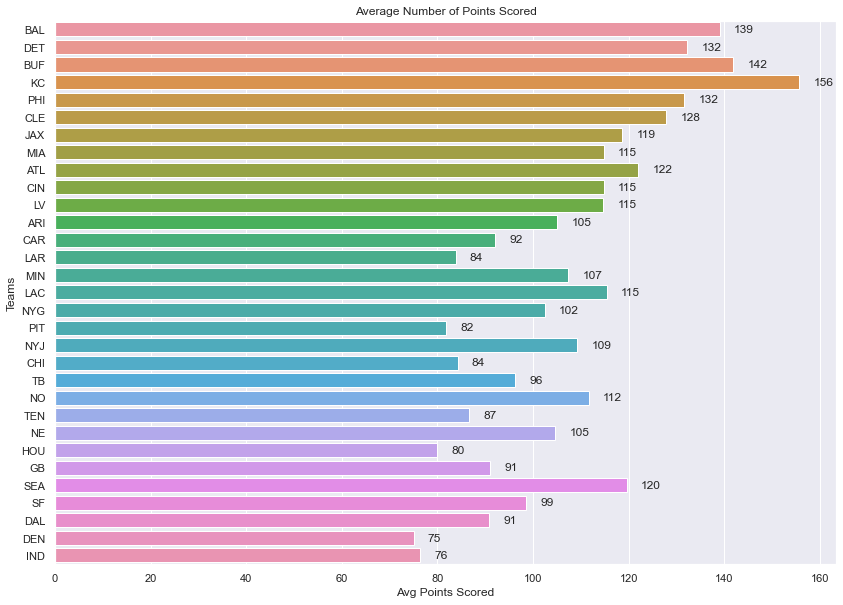

In [18]:
# not answer the idea / code you gave us in class
sns.set(rc={'figure.figsize':(14,10)})
ax = sns.barplot(x='points_scored', y='Abbreviation', data=df, orient='h',ci=None)
ax.set(title='Average Number of Points Scored') # title barplot
# label each bar in barplot
ax.set(xlabel='Avg Points Scored')
ax.set(ylabel='Teams')
for p in ax.patches:
 height = p.get_height() # height of each horizontal bar is the same
 width = p.get_width() # width (average number of passengers)
 # adding text to each bar
 ax.text(x = width+3, # x-coordinate position of data label, padded 3 to right of bar
 y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
 s = '{:.0f}'.format(width), # data label, formatted to ignore decimals
 va = 'center') # sets vertical alignment (va) to center

Text(0, 0.5, 'Teams')

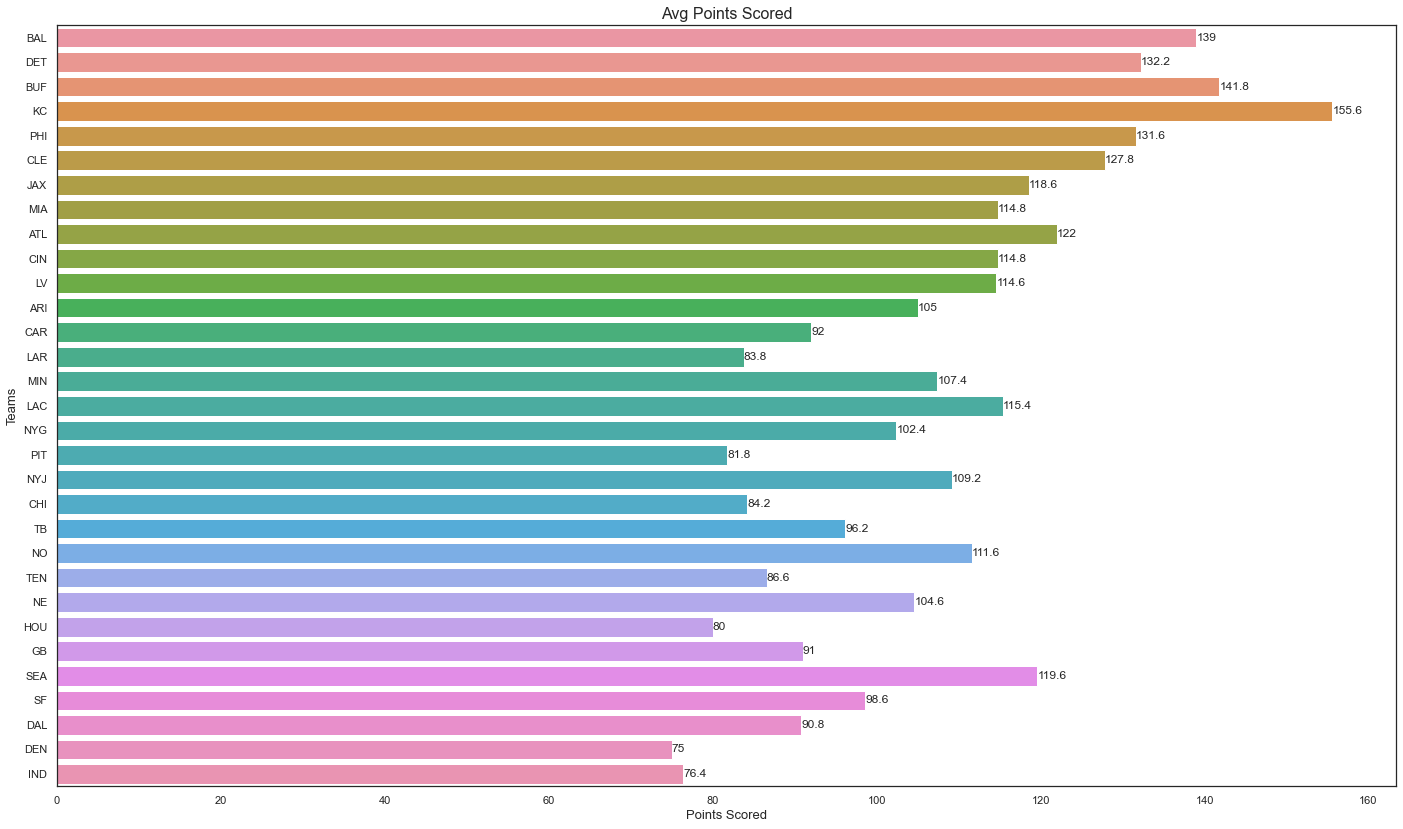

In [19]:
#answer = df.groupby('team').points_scored.mean()

plt.figure(figsize=(24, 14))
sns.set_style('white')
ax = sns.barplot(
    y= df.Abbreviation,
    x= df.points_scored,
    data=df.points_scored,
    ci=None
)

for i in ax.containers:
    ax.bar_label(i,)

plt.title("Avg Points Scored", fontsize=16)
plt.xlabel("Points Scored",fontsize=13)
plt.ylabel("Teams",fontsize=13)

3. Plot the average passing yards and average rushing yards for each team as a stacked bar chart.

C:\Users\kodom\AppData\Local\Temp\ipykernel_21268\2134628659.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_pass_rush = df.groupby('Abbreviation')['passing_yards','rushing_yards'].mean()


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1440x1440 with 0 Axes>

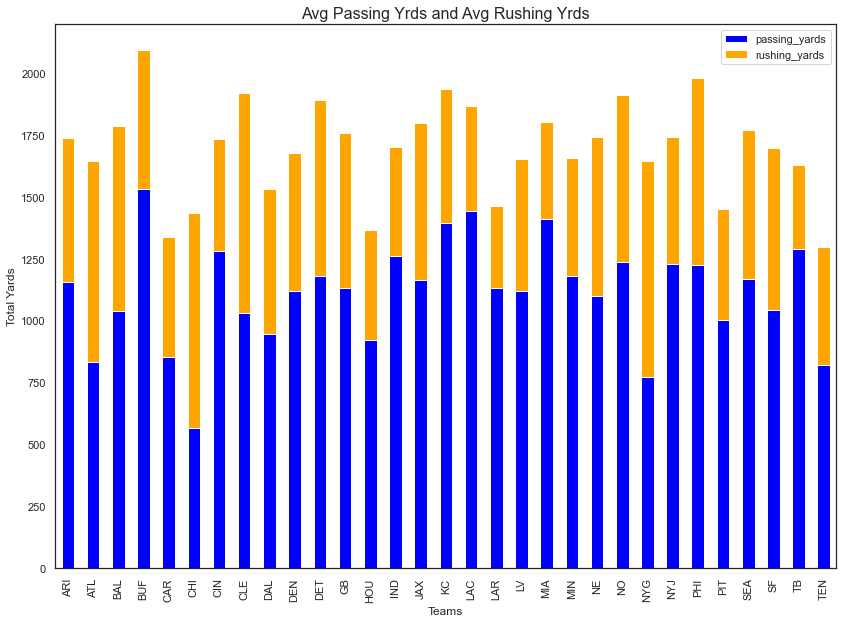

In [20]:
avg_pass_rush = df.groupby('Abbreviation')['passing_yards','rushing_yards'].mean()
avg_pass_rush

plt.figure(figsize=(20,20))
sns.set_style('white')
avg_pass_rush.plot(kind='bar', stacked=True, color=['blue','orange'])
plt.title("Avg Passing Yrds and Avg Rushing Yrds",fontsize=16)
plt.xlabel("Teams",fontsize=12)
plt.ylabel("Total Yards",fontsize=12)
#bar1 = sns.barplot(x=avg_pass, y=df.team, color='red')
#bar2 = sns.barplot(x=avg_rush, y=df.team, color='purple')
plt.show

Text(0, 0.5, 'Total Yards')

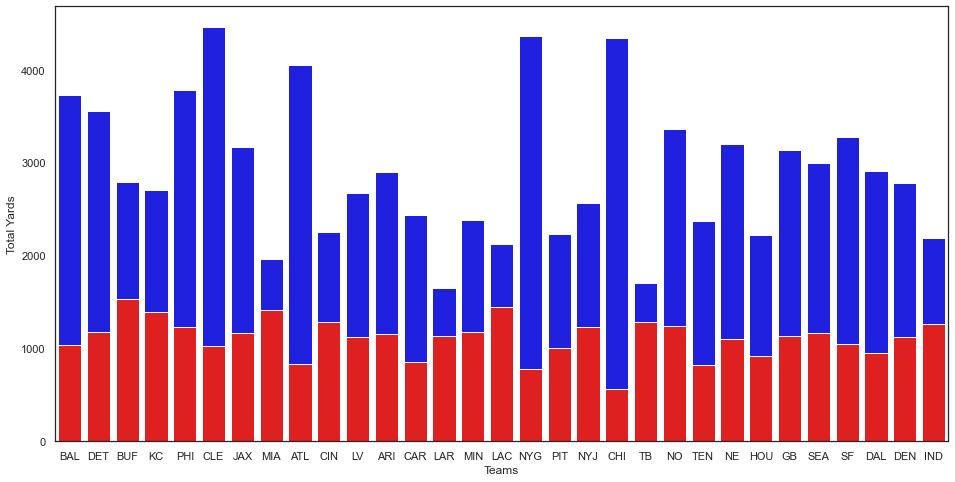

In [21]:
# in class code
plt.figure(figsize=(16,8))
sns.barplot( data=df, x=df.Abbreviation, y=df.rushing_yards,ci=None, estimator=np.sum, color='blue')
sns.barplot( data=df, x=df.Abbreviation, y=df.passing_yards,ci=None, color='red')
plt.xlabel('Teams')
plt.ylabel('Total Yards')

4. Plot the average total yards vs average first downs for each team on a scatter plot (with first downs on the x axis and total yards on the y axis).

Text(0.5, 1.0, 'Avg Total Yards vs. Avg First Downs')

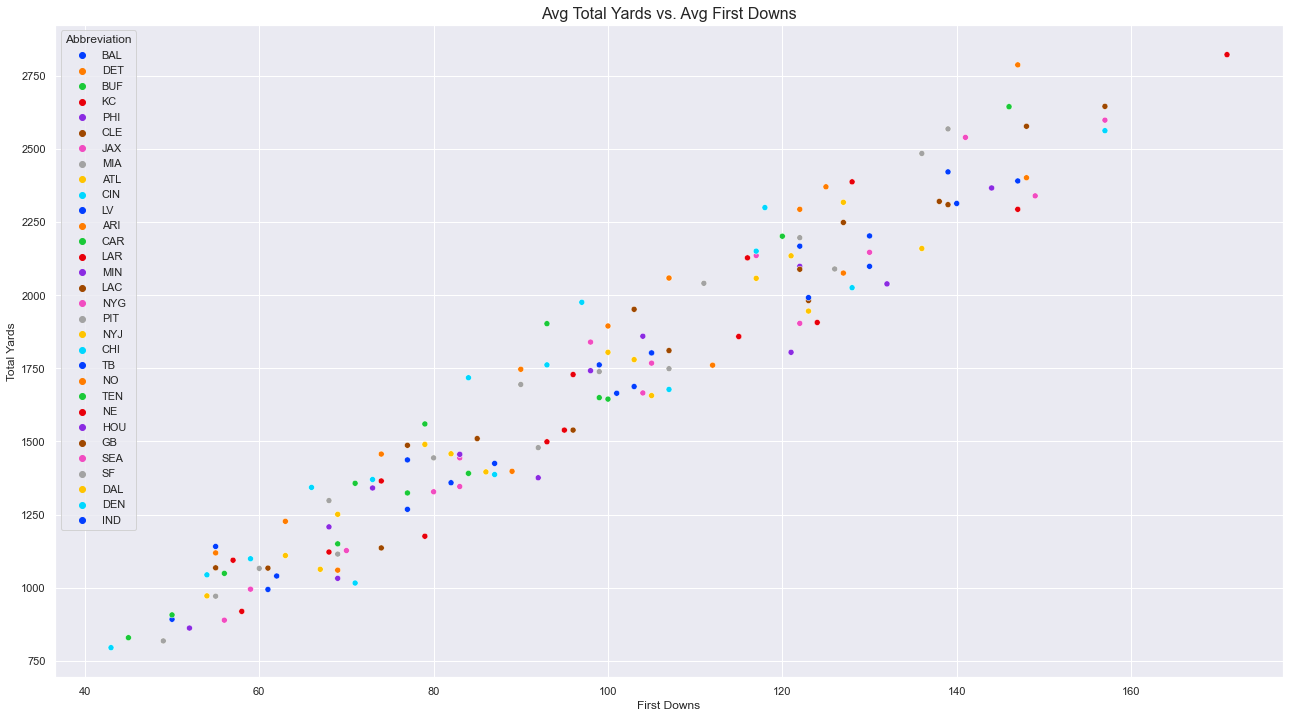

In [22]:
#avg_yar = df.groupby('team').total_yards.mean()
#avg_fd = df.groupby('team').first_downs.mean()
plt.figure(figsize=(22,12))
sns.set_style('darkgrid')
sns.scatterplot(
    x=df.first_downs,
    y=df.total_yards,
    data=df.Abbreviation,
    hue=df.Abbreviation,
    palette='bright'
)
plt.xlabel("First Downs")
plt.ylabel("Total Yards")
plt.title("Avg Total Yards vs. Avg First Downs",fontsize=16)

5. Plot the penalty yards for the Balitmore Ravens and the LA Rams for each week as a line chart (with week on the x-axis and penalty yards on the y-axis).

Text(0.5, 1.0, 'Penalty Yards for Baltimore Ravens and LA Rams')

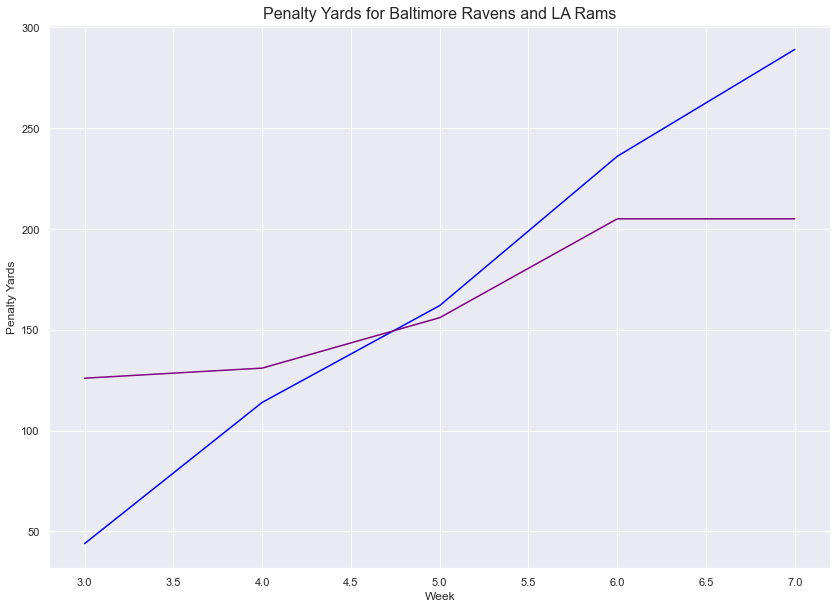

In [23]:
sns.lineplot(x=df.week,y=df[df.team == 'Baltimore Ravens'].penalty_yards,color='Blue')
sns.lineplot(x=df.week,y=df[df.team == 'Los Angeles Rams'].penalty_yards,color='Purple')
#plt.legend(loc='Lower right',labels=["Baltimore Ravens","Los Angeles Rams"])
# having trouble getting a legend
plt.xlabel("Week")
plt.ylabel("Penalty Yards")
plt.title("Penalty Yards for Baltimore Ravens and LA Rams",fontsize=16)

6. Plot the average total points vs average yards per play for each team as a scatter plot (with total points on the y-axis and yards per play on the x-axis).

Text(0.5, 1.0, 'Avg Total Points vs. Avg Yards Per Play')

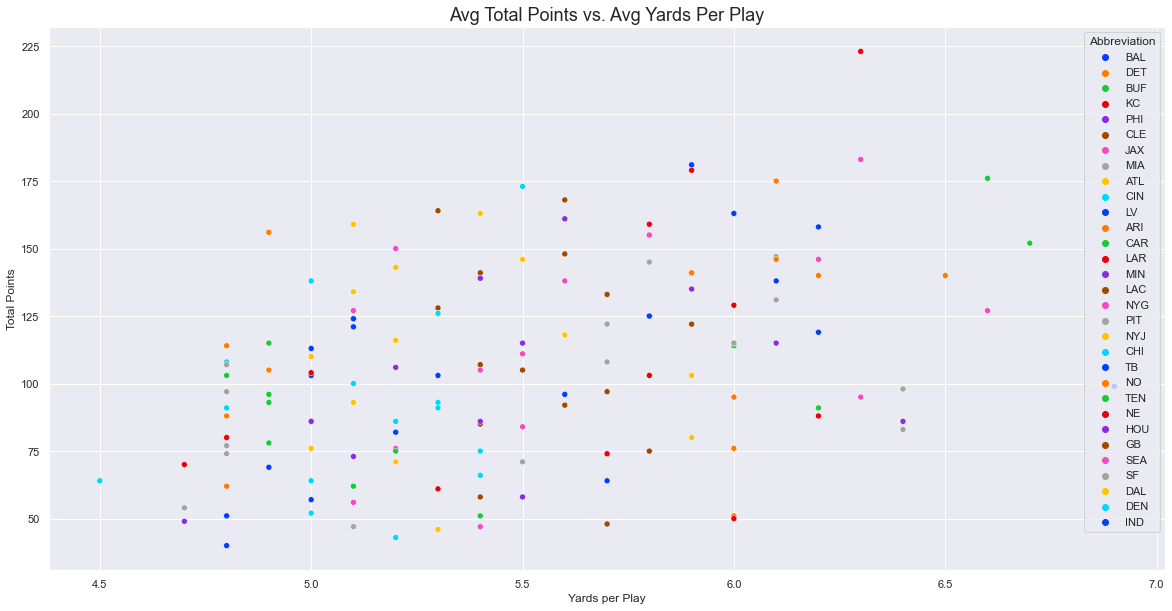

In [24]:
#tot_pt = df.groupby('team').points_scored.mean()
#avg_yer_per = df.groupby('team').yards_per_play.mean()
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
sns.scatterplot(
    x= df.yards_per_play,
    y= df.points_scored,
    data=df.Abbreviation,
    hue=df.Abbreviation,
    palette='bright'
)
plt.xlabel("Yards per Play",fontsize=12)
plt.ylabel("Total Points",fontsize=12)
plt.title("Avg Total Points vs. Avg Yards Per Play",fontsize=18)

7. Plot the number of penalty yards for each team in the NFC West for each week on bar chart.

Text(0.5, 1.0, 'Penalty Yrds for Teams in NFC West')

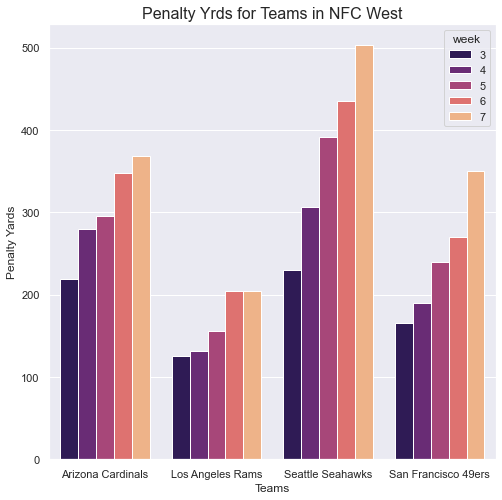

In [25]:
plt.figure(figsize=(8,8))
sns.set_style('darkgrid')
sns.barplot(
    x= df[(df.Conference == 'NFC') & (df.Division == 'West')].team,
    y= df.penalty_yards,
    hue=df.week,
    palette="magma",
    ci=None
)

plt.xlabel("Teams", fontsize=12)
plt.ylabel("Penalty Yards", fontsize=12)
plt.title("Penalty Yrds for Teams in NFC West", fontsize=16)


8. Plot the average number of weekly points per (conference and division) on a horizontal bar chart. (There will be 8 bars.)

Text(0.5, 0, 'Points')

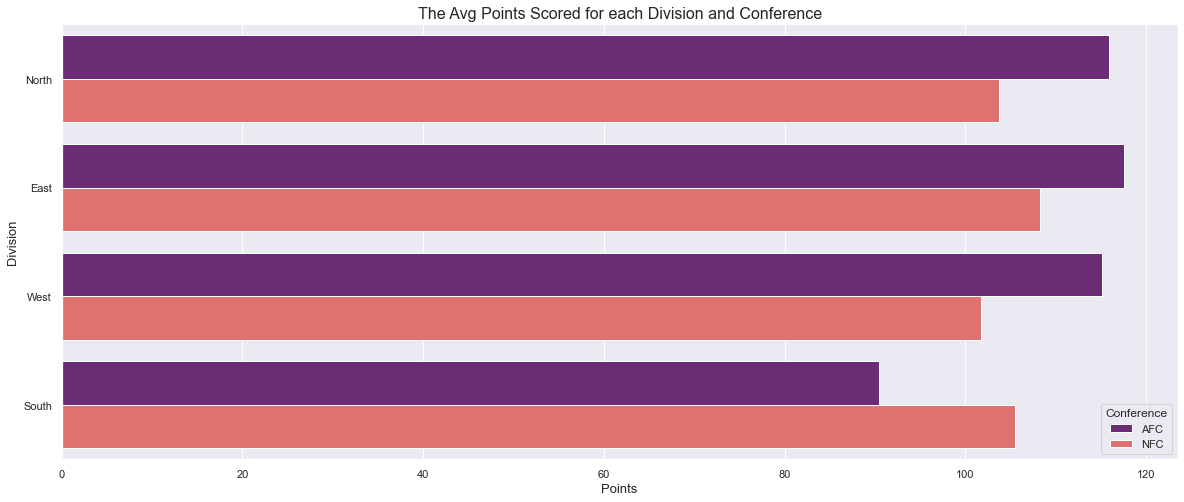

In [26]:
plt.figure(figsize=(20,8))
sns.barplot(
    y=df.Division,
    x=df.points_scored,
    hue=df.Conference,
    ci=None,
    palette='magma'
)

plt.title("The Avg Points Scored for each Division and Conference",fontsize=16)
plt.ylabel("Division",fontsize=13)
plt.xlabel("Points",fontsize=13)